In [66]:
# cell 1
# Importing all necessary packages from python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
# cell 2
# Loading dataset (this is a csv file)
data = pd.read_csv("churn.csv")

##### 1- Examining dataset structure:
Randomly choose 10 of them (total 10,000)

In [44]:
# cell 3
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2374,2375,15726186,Genovese,639,Spain,Male,29,4,133434.57,2,1,0,97983.44,0
8458,8459,15728542,Vorobyova,850,France,Female,71,4,0.00,2,1,1,107236.87,0
9197,9198,15611947,Banks,557,France,Male,34,3,83074.00,1,1,0,132673.22,0
1118,1119,15759381,Johnson,617,Spain,Male,61,7,91070.43,1,1,1,101839.77,0
5000,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0
4878,4879,15579433,Pugh,793,Spain,Male,29,8,96674.55,2,0,0,192120.66,0
7090,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
2107,2108,15714586,Marcelo,646,Spain,Female,42,3,99836.47,1,0,1,22909.56,0
8580,8581,15801915,Rendall,529,France,Female,31,6,152310.55,1,1,0,13054.25,0
6839,6840,15768282,Perez,724,Germany,Male,36,6,94615.11,2,1,1,10627.21,0


##### I- Interpretation on data:
As we know, "RowNumber", "CustomerId" and "Surname" of each person do not affect the desire to stay or leave the bank.

In [45]:
# cell 4
# In this case, we can remove those three features from the dataset.
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

##### Check if it was deleted correctly?

In [46]:
# cell 5
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9834,516,France,Female,46,6,62212.29,1,0,1,171681.86,1
7736,649,France,Female,41,3,130931.83,1,1,1,144808.37,0
9708,737,Germany,Female,22,10,111543.26,2,0,0,106327.85,0
355,539,France,Male,30,0,0.00,2,1,0,160979.66,0
8483,433,Spain,Male,34,9,152806.74,1,1,0,19687.99,0
6550,637,Germany,Female,39,3,109698.41,1,1,1,88391.29,1
3457,657,Spain,Male,36,8,188241.05,2,0,0,183058.51,1
1363,775,Spain,Male,30,4,0.00,2,0,1,57461.13,0
7587,594,Spain,Female,38,7,96858.35,1,1,0,77511.45,0
6071,625,Spain,Male,52,8,121161.57,1,1,0,48988.28,0


In [47]:
# cell 6
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##### We don't have any Not-A-Number(NaN) or missing values.

##### In order to be able to give the dataset to the model (although we haven't specified it yet), the values ​​of all the features must be numerical.
As you saw result of the cell 6, "Geography" and "Gender" are nominal (name and without order) features. we have two way change categorical features (they aren't numbers) into numerical features.
##### We have two main way: 1- OneHot Encoding 2- Labeling Encoding
##### Both of them are useful but when we face with nominal features (categorical without order) it's necessary to use OneHot Encoding. Because if we use Label Encoding, the order that occurs between the numbers will affect the training of the model and its subsequent predictions.

In [48]:
# cell 7
# Using OneHot Encoding:
data = pd.get_dummies(data, dtype=np.int64)

In [49]:
# cell 8
data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6537,521,39,3,146408.68,1,0,0,72993.67,0,0,0,1,1,0
5604,602,49,0,191808.73,1,0,0,97640.20,0,1,0,0,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,0,1,1,0
9129,838,40,6,61671.19,1,0,1,150659.35,1,0,0,1,1,0
8548,517,46,4,0.00,1,1,0,22372.78,0,0,0,1,0,1
1901,796,67,5,0.00,2,0,1,54871.02,0,0,0,1,0,1
9252,451,31,7,140931.82,1,0,1,20388.77,0,1,0,0,1,0
7284,667,35,4,97585.32,2,0,0,57213.46,0,0,0,1,0,1
4663,620,35,0,76989.97,1,1,1,17242.79,0,0,1,0,0,1
1337,710,30,10,133537.10,2,1,0,155593.74,0,0,1,0,1,0


In [50]:
# cell 9
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  Gender_Female      10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [64]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### As you see, now we have only 14 features for each person.
Notice that our customers are only from Germany, French and Spain.

##### Now I want to see which of the features are fully correlated. so that I can remove one of them to increase the learning speed of the model and its prediction also.
In this case we use correlation plot to examin that:

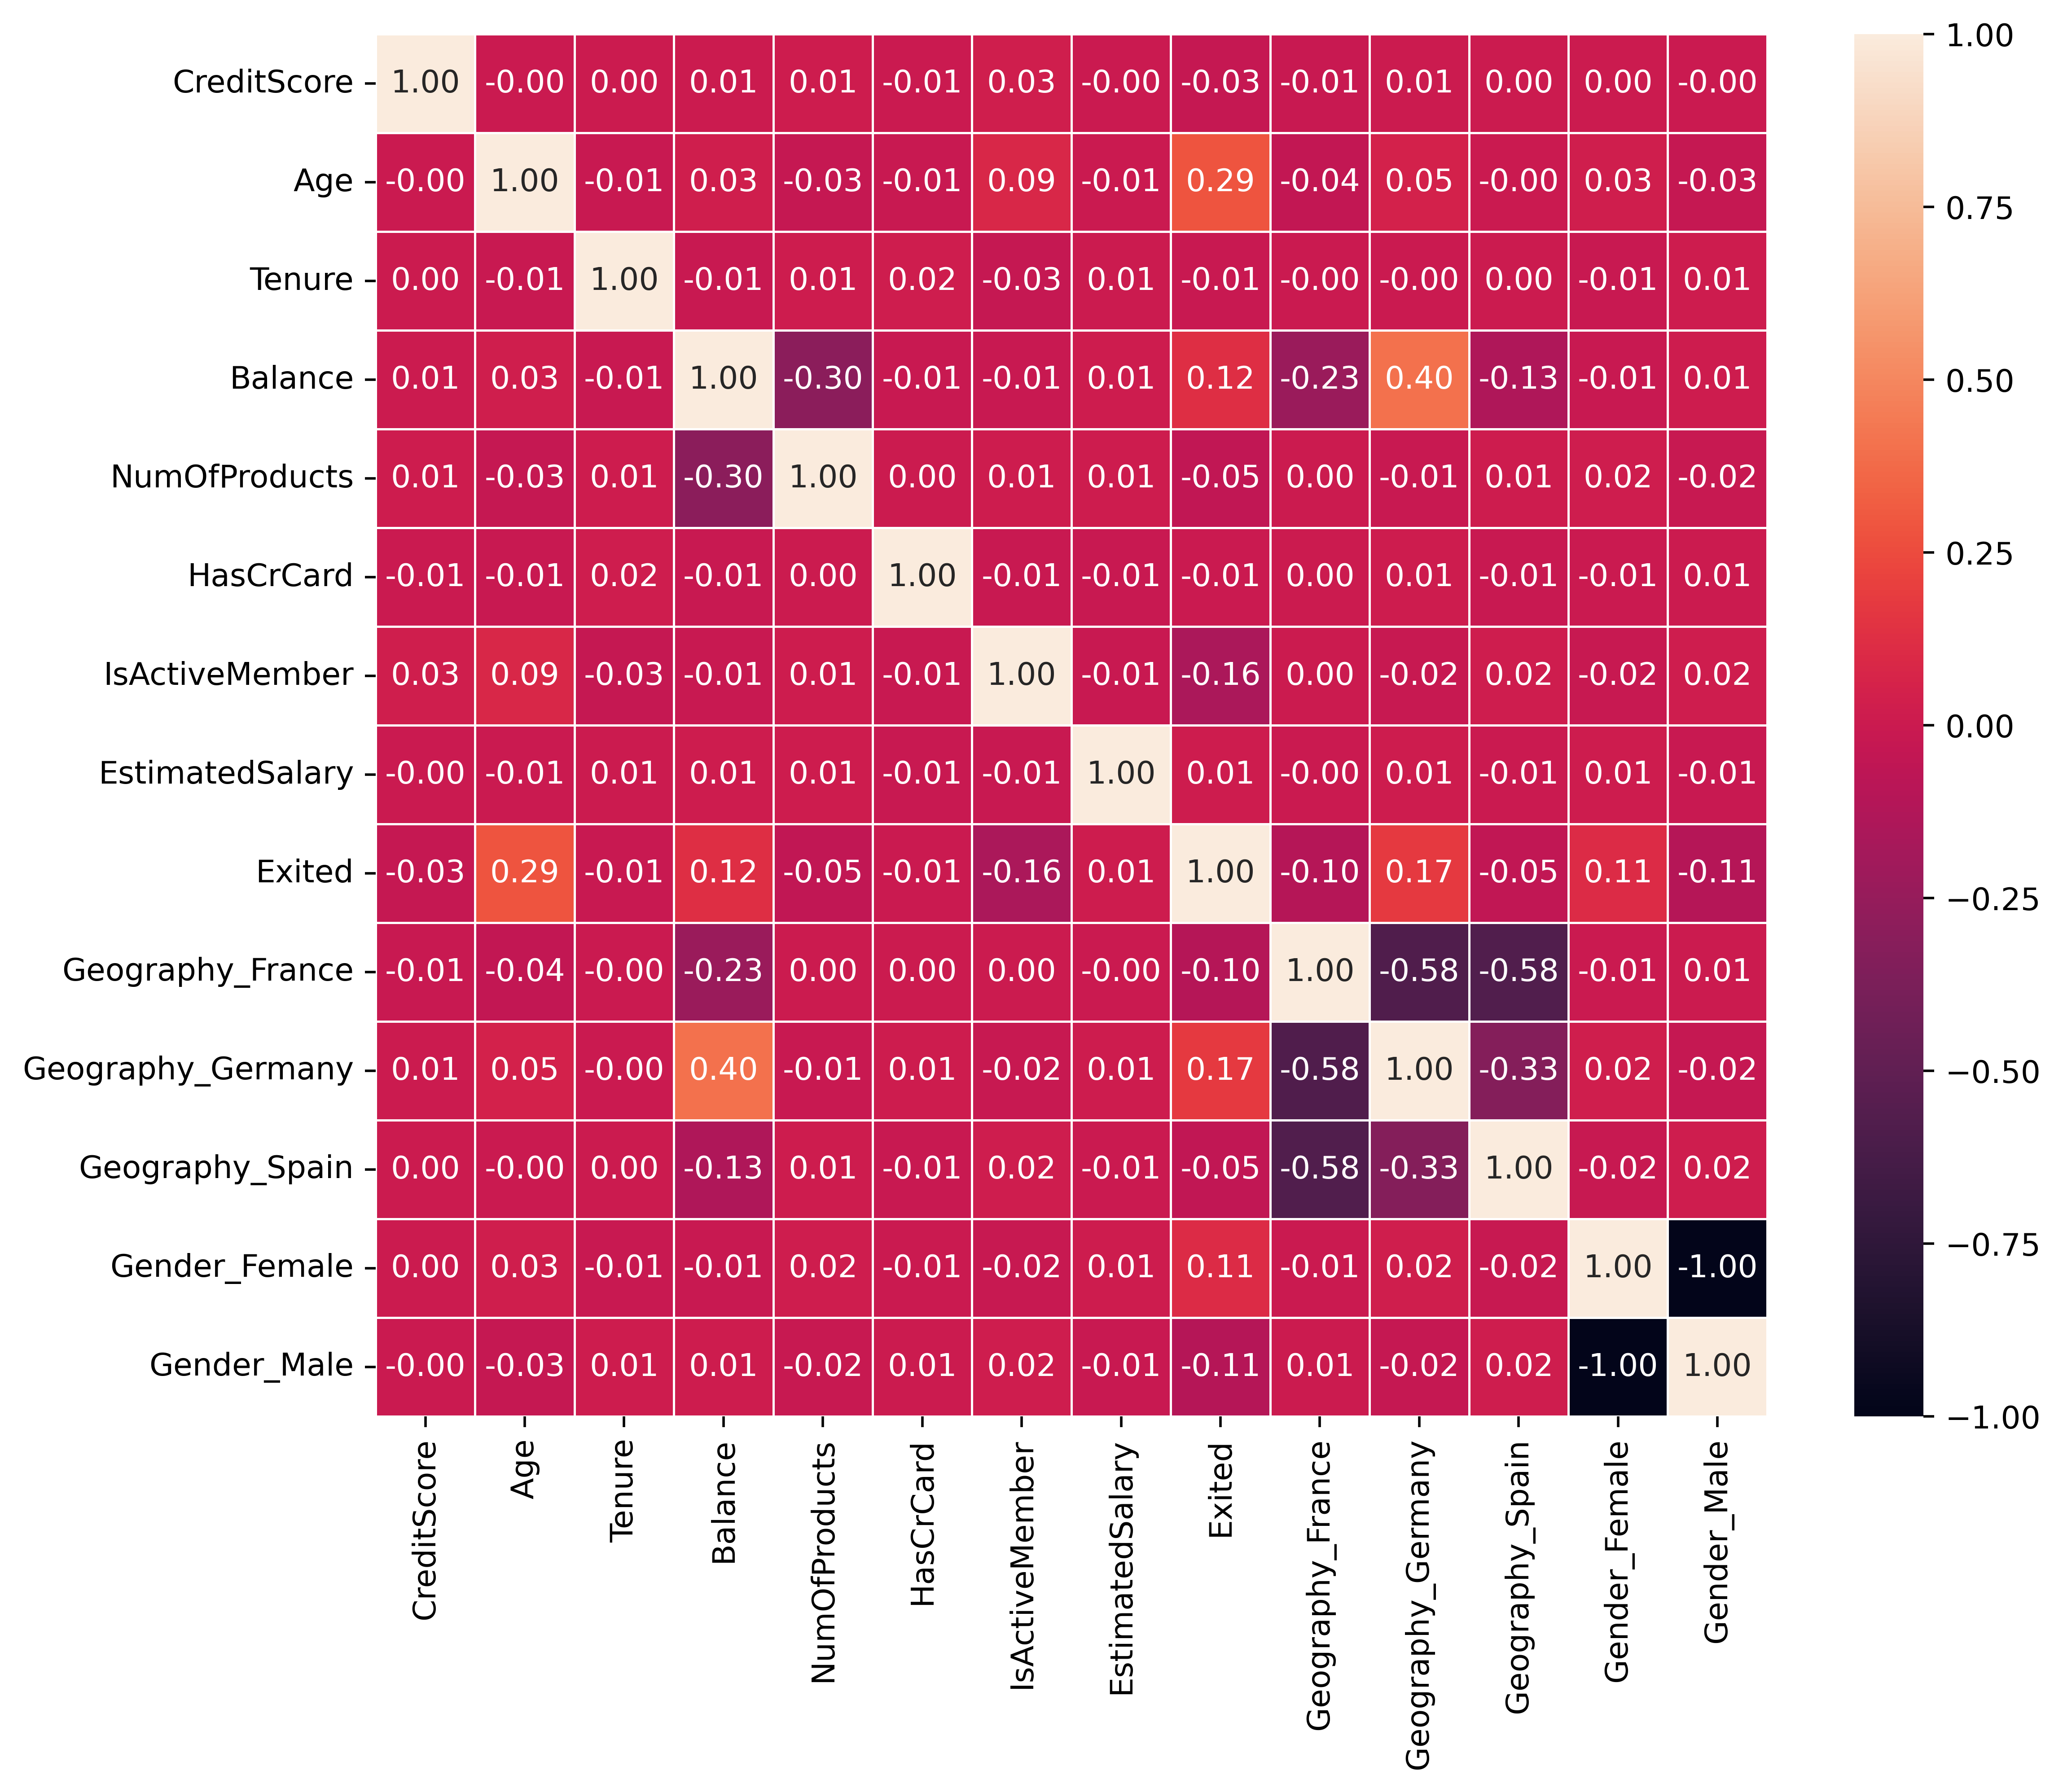

In [63]:
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=.5)
plt.show()

##### Scaling

In [67]:
robust_scaler = RobustScaler().fit(data)
data = robust_scaler.transform(data)

##### Split data into Train and Test

In [69]:
X = data.drop(['Exited'], axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

##### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=None)
